In [3]:
from main import main
main(1)

Ultralytics YOLOv8.2.51 🚀 Python-3.11.2 torch-2.3.1 CPU (Cortex-A76)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (6.5 MB)

TorchScript: starting export with torch 2.3.1...
TorchScript: export success ✅ 9.1s, saved as 'yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3.torchscript' (13.0 MB)

NCNN: starting export with NCNN 1.0.20240410...
NCNN: running '/usr/local/lib/python3.11/dist-packages/ultralytics/pnnx yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3.torchscript ncnnparam=yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.ncnn.param ncnnbin=yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.ncnn.bin ncnnpy=yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model_ncnn.py pnnxparam=yolov8n-seg

pnnxparam = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.pnnx.param
pnnxbin = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.pnnx.bin
pnnxpy = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model_pnnx.py
pnnxonnx = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.pnnx.onnx
ncnnparam = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.ncnn.param
ncnnbin = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model.ncnn.bin
ncnnpy = yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model/model_ncnn.py
fp16 = 0
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = ultralytics.nn.modules.block.Bottleneck
inline module = ultralytics.nn.modules.block.C2f
inline module = ultralytics.nn.modules.block.DFL
inline module = ultralytics.nn.modules.block.Proto
inline module =

NCNN: export success ✅ 4.7s, saved as 'yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model' (12.6 MB)

Export complete (16.2s)
Results saved to /home/dorna/cardamom
Predict:         yolo predict task=segment model=yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model imgsz=640  
Validate:        yolo val task=segment model=yolov8n-seg_cardamom_good_bad_nano_tile_null_removed_v3_ncnn_model imgsz=640 data=/content/Cardamom-good-bad--24/data.yaml  
Visualize:       https://netron.app
[2024/11/12 06:39:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_siz

KeyboardInterrupt: 

True
True
True
True


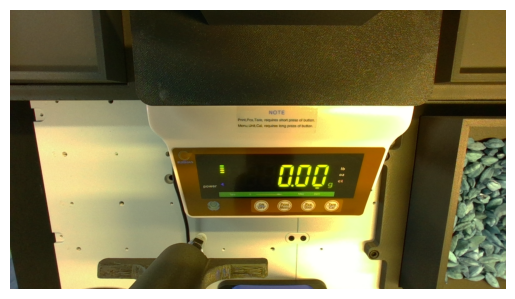

In [16]:
from camera import Camera
import numpy as np
import matplotlib.pyplot as plt

for i in range(4):
    c = Camera()
    print(c.connect(serial_number="130322272239", preset_path="Intel_RealSense_D405.json", filter={}))
    depth_frame, _, _, _, _, color_img, depth_int, _, _ = c.get_all() 
    c.close()
    
# Display the image using matplotlib
plt.imshow(color_img, cmap='gray')  # Use 'gray' for grayscale images
plt.axis('off')  # Turn off the axis labels
plt.show()


In [10]:
import subprocess
import re

def get_realsense_devices():
    try:
        # Run the rs-enumerate-devices command
        result = subprocess.run(['rs-enumerate-devices'], capture_output=True, text=True, check=True)
        output = result.stdout
        
        # Split the output by device info blocks
        devices = output.strip().split("Device info:")
        device_list = []
        
        for device in devices[1:]:  # Skip the first empty split
            device_info = {}
            for line in device.strip().split("\n"):
                match = re.match(r'\s*(.+?)\s+:\s+(.+)', line)
                if match:
                    key, value = match.groups()
                    device_info[key.strip()] = value.strip()
            device_list.append(device_info)
        
        return device_list
    except subprocess.CalledProcessError as e:
        print(f"Error running rs-enumerate-devices: {e}")
        return []

# Example usage
devices = get_realsense_devices()
print(devices)


[{'Name': 'Intel RealSense D405', 'Serial Number': '130322272239', 'Firmware Version': '5.16.0.1', 'Recommended Firmware Version': '5.16.0.1', 'Physical Port': '2-1-58', 'Debug Op Code': '15', 'Advanced Mode': 'YES', 'Product Id': '0B5B', 'Camera Locked': 'YES', 'Usb Type Descriptor': '3.2', 'Product Line': 'D400', 'Asic Serial Number': '231323071488', 'Firmware Update Id': '231323071488', 'Dfu Device Path': ''}]


In [9]:
import pyrealsense2 as rs

ctx = rs.context()
devices = ctx.query_devices()
for dev in devices:
    dev.hardware_reset()

In [15]:
import pyrealsense2 as rs

def get_connected_cameras():
    cameras = []
    ctx = rs.context()
    devices = ctx.query_devices()  # Get all connected devices
    for dev in devices:
        camera_info = {
            "serial_number": dev.get_info(rs.camera_info.serial_number),
            "name": dev.get_info(rs.camera_info.name),
            "product_line": dev.get_info(rs.camera_info.product_line),
            "firmware_version": dev.get_info(rs.camera_info.firmware_version)
        }
        cameras.append(camera_info)
    return cameras

# Example usage
connected_cameras = get_connected_cameras()
print(connected_cameras)


[{'serial_number': '130322272239', 'name': 'Intel RealSense D405', 'product_line': 'D400', 'firmware_version': '5.16.0.1'}]
